What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [130]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("MasterCapStoneFile_01.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~..py\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [131]:
df.head().T

,0,1,2,3,4
HD_M_Value,4.200000,4.700000,5.800000,4.400000,4.000000
HD_M_US,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,-0.343750,-0.265625,-0.093750,-0.312500,-0.375000
HBP_M_Value,32.300000,28.300000,33.800000,27.400000,33.000000
HBP_M_US,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,-0.003086,-0.126543,0.043210,-0.154321,0.018519
HC_M_Value,34.100000,21.800000,36.700000,27.100000,35.000000
HC_M_US,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,0.000000,-0.360704,0.076246,-0.205279,0.026393
OB_M_Value,30.300000,30.600000,17.300000,22.100000,25.700000


In [132]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,27210.000000,2.721000e+04,27210.000000,27210.000000,2.721000e+04,27210.000000,27210.000000,2.721000e+04,27210.000000,27210.000000,2.721000e+04,27210.000000,27210.000000,2.721000e+04,27210.000000,27210.000000
mean,5.602977,6.400000e+00,-0.124535,30.653208,3.240000e+01,-0.053913,31.364296,3.410000e+01,-0.080226,30.472922,3.010000e+01,0.012389,10.811062,1.080000e+01,0.001024,3.211466
std,2.118858,3.244575e-12,0.331072,8.260472,1.514194e-11,0.254953,4.887047,1.554696e-11,0.143315,8.180685,1.451665e-11,0.271784,4.269441,5.533453e-12,0.395319,1.449541
min,0.300000,6.400000e+00,-0.953125,5.300000,3.240000e+01,-0.836420,6.900000,3.410000e+01,-0.797654,9.600000,3.010000e+01,-0.681063,0.800000,1.080000e+01,-0.925926,0.300000
25%,4.200000,6.400000e+00,-0.343750,25.300000,3.240000e+01,-0.219136,28.800000,3.410000e+01,-0.155425,24.500000,3.010000e+01,-0.186047,7.900000,1.080000e+01,-0.268519,2.300000
50%,5.300000,6.400000e+00,-0.171875,29.500000,3.240000e+01,-0.089506,31.700000,3.410000e+01,-0.070381,29.500000,3.010000e+01,-0.019934,10.000000,1.080000e+01,-0.074074,2.900000
75%,6.700000,6.400000e+00,0.046875,34.900000,3.240000e+01,0.077160,34.400000,3.410000e+01,0.008798,35.600000,3.010000e+01,0.182724,12.900000,1.080000e+01,0.194444,3.800000
max,35.800000,6.400000e+00,4.593750,70.300000,3.240000e+01,1.169753,55.400000,3.410000e+01,0.624633,58.600000,3.010000e+01,0.946844,39.500000,1.080000e+01,2.657407,19.500000


In [133]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

Index:   RangeIndex(start=0, stop=27210, step=1)
Columns: Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')
Size:    435360
Shape:   (27210, 16)


,count,mean,std,min,25%,50%,75%,max
HD_M_Value,27210.0,5.602977,2.118858e+00,0.300000,4.200000,5.300000,6.700000,35.800000
HD_M_US,27210.0,6.400000,3.244575e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,27210.0,-0.124535,3.310716e-01,-0.953125,-0.343750,-0.171875,0.046875,4.593750
HBP_M_Value,27210.0,30.653208,8.260472e+00,5.300000,25.300000,29.500000,34.900000,70.300000
HBP_M_US,27210.0,32.400000,1.514194e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,27210.0,-0.053913,2.549528e-01,-0.836420,-0.219136,-0.089506,0.077160,1.169753
HC_M_Value,27210.0,31.364296,4.887047e+00,6.900000,28.800000,31.700000,34.400000,55.400000
HC_M_US,27210.0,34.100000,1.554696e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,27210.0,-0.080226,1.433152e-01,-0.797654,-0.155425,-0.070381,0.008798,0.624633
OB_M_Value,27210.0,30.472922,8.180685e+00,9.600000,24.500000,29.500000,35.600000,58.600000


In [134]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [135]:
df.columns


Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [136]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
df["DB_M_Value"].describe()



count    27210.000000
mean        10.811062
std          4.269441
min          0.800000
25%          7.900000
50%         10.000000
75%         12.900000
max         39.500000
Name: DB_M_Value, dtype: float64

In [137]:
#df.describe().T
df["Target_Value"].describe()

count    27210.000000
mean         3.211466
std          1.449541
min          0.300000
25%          2.300000
50%          2.900000
75%          3.800000
max         19.500000
Name: Target_Value, dtype: float64

In [138]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [139]:
from scipy.stats import skew

In [140]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

4.5

In [141]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


6.4

In [178]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [180]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



1.0792773344137288
0.6676174753148516
-0.6720892830752534
0.4346587930768115
0.9341111752022793
1.469497031897568


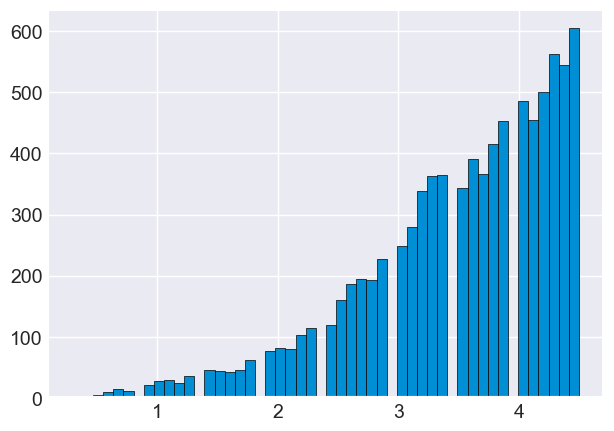

In [143]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

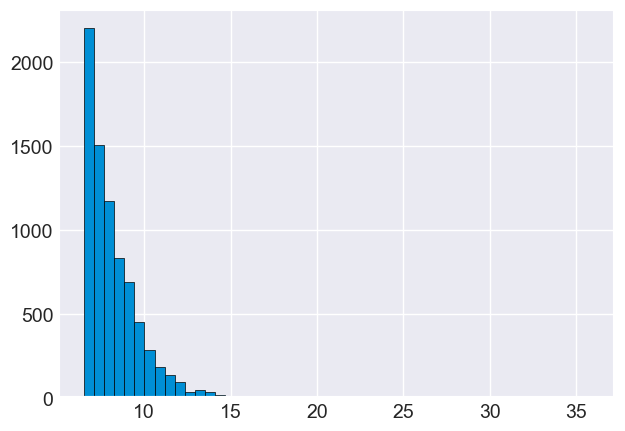

In [144]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

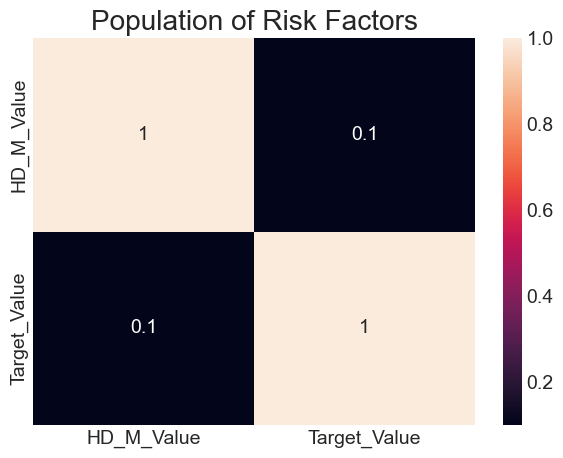

In [182]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

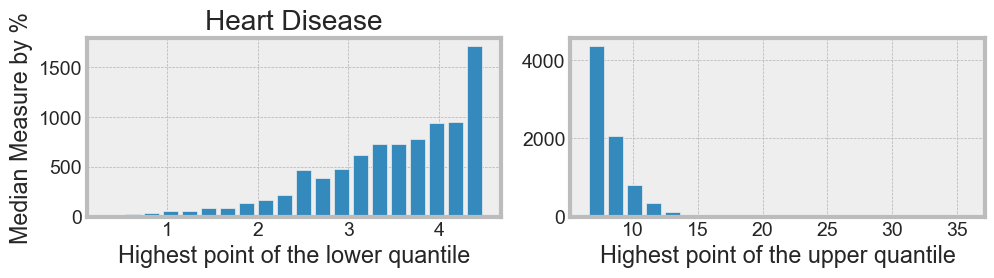

In [176]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

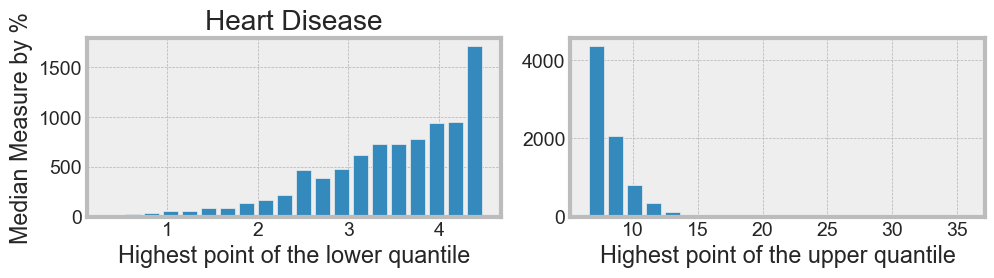

In [175]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

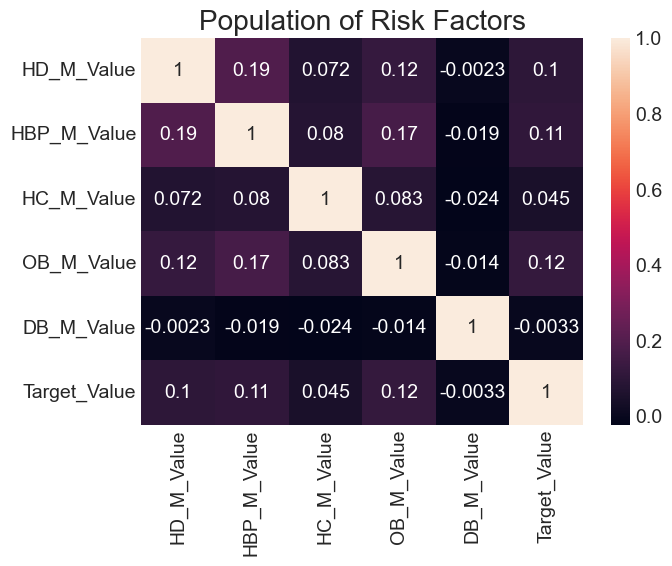

In [145]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

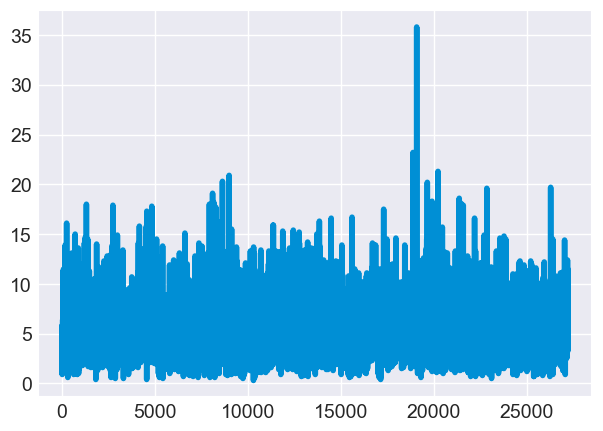

In [146]:
# create line charts

#plt.figure(figsize=(12,8()))
plt.plot(df.HD_M_Value)
plt.show()

Histrograms =  show the frequency of distribution. 

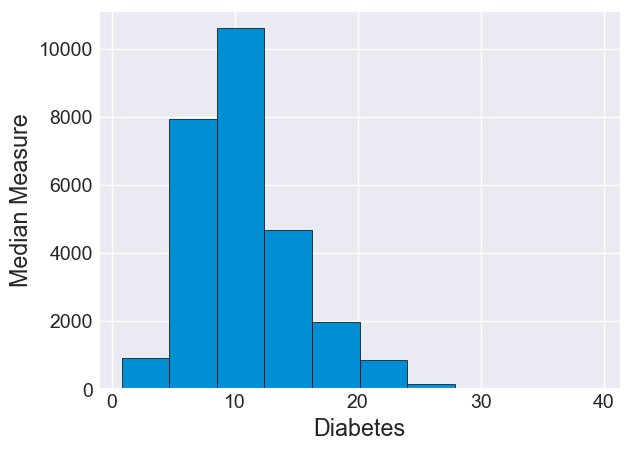

In [147]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

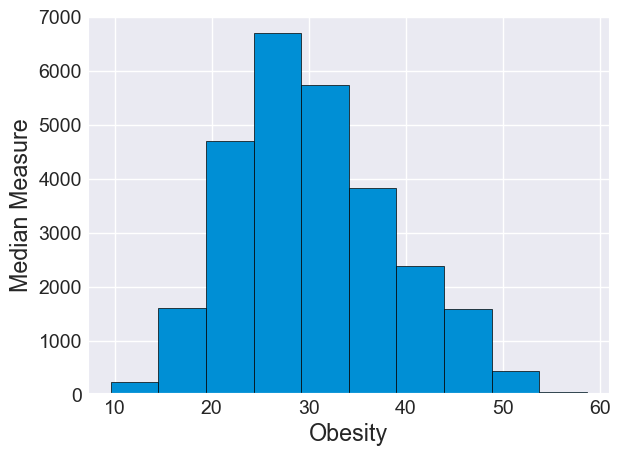

In [148]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

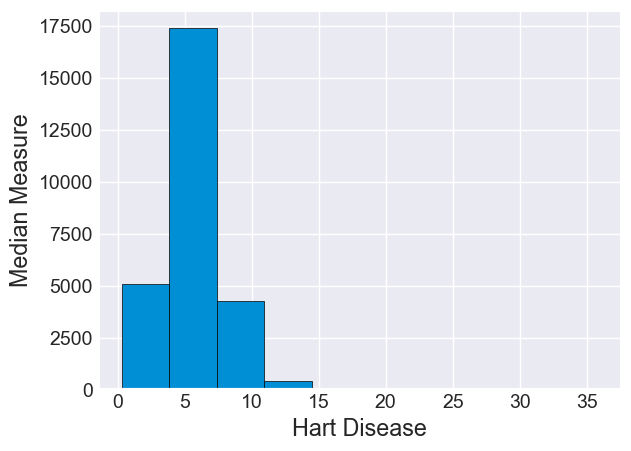

In [149]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

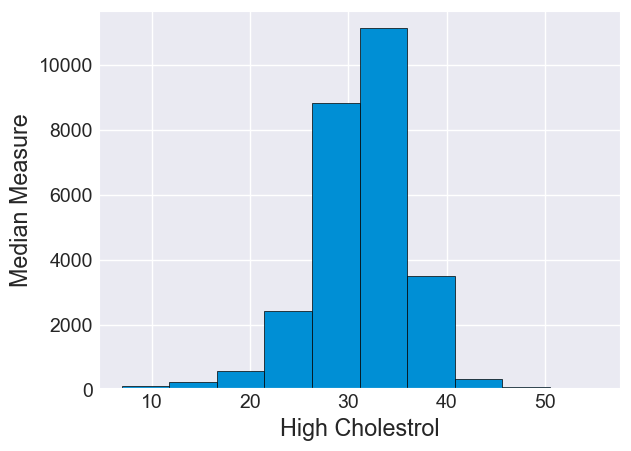

In [150]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

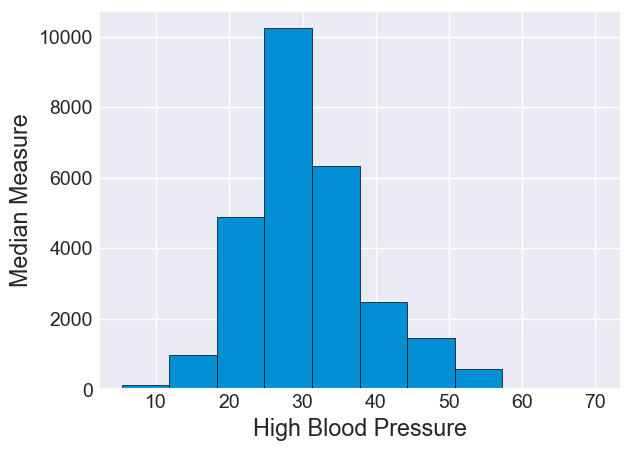

In [151]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

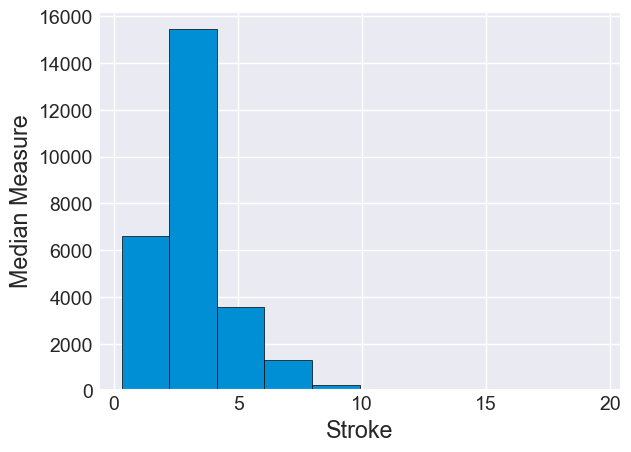

In [152]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [153]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

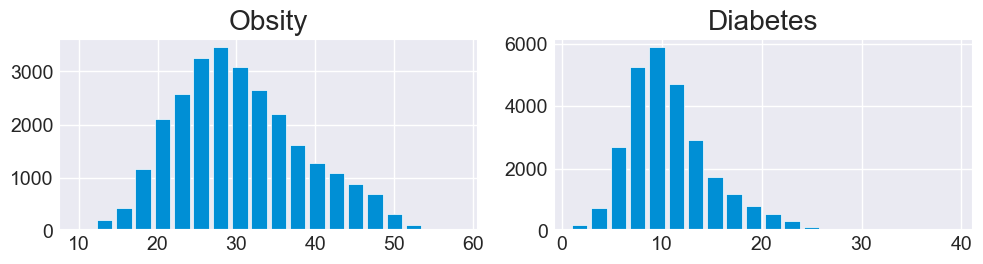

In [154]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




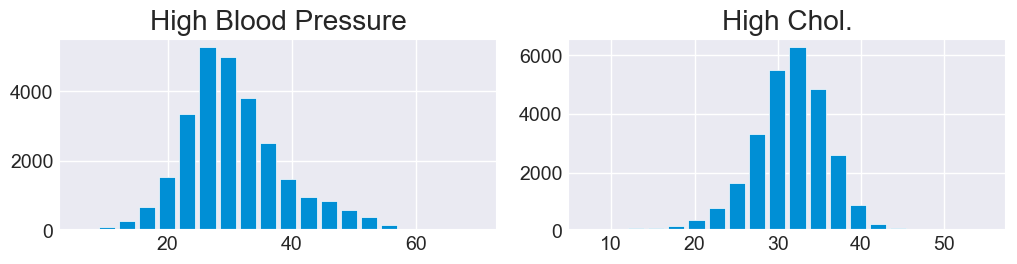

In [155]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




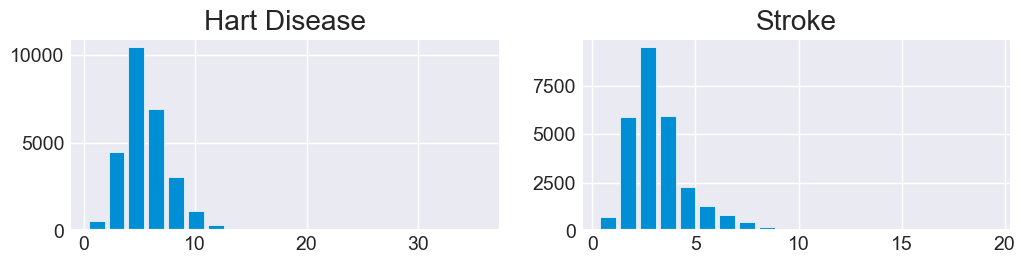

In [156]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



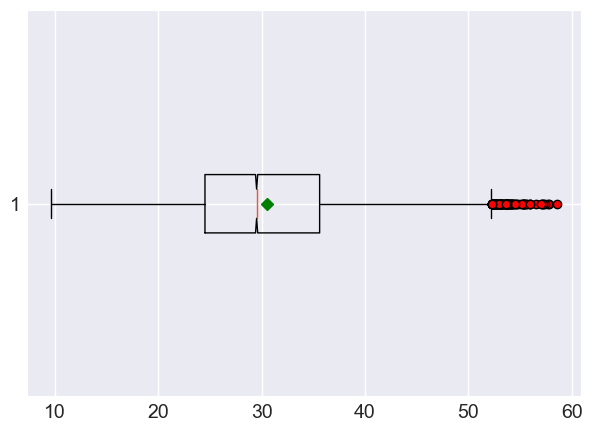

In [157]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

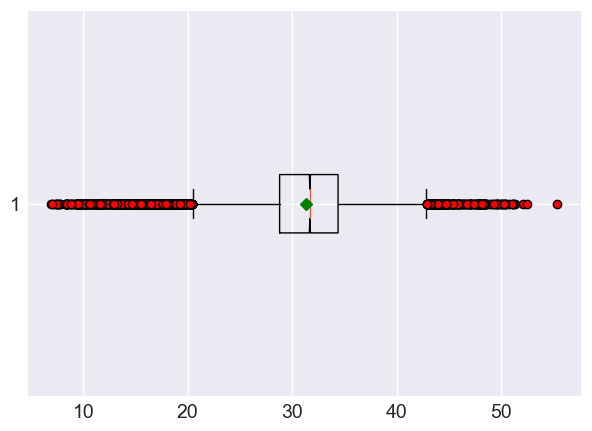

In [158]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

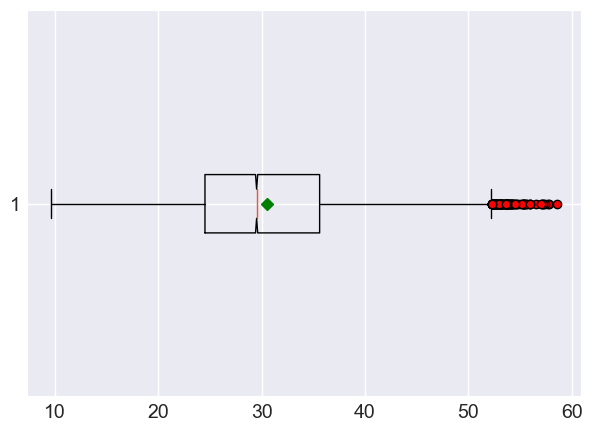

In [159]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

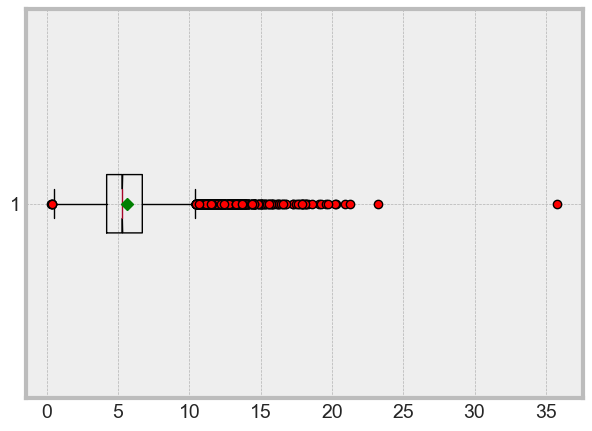

In [181]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HD_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

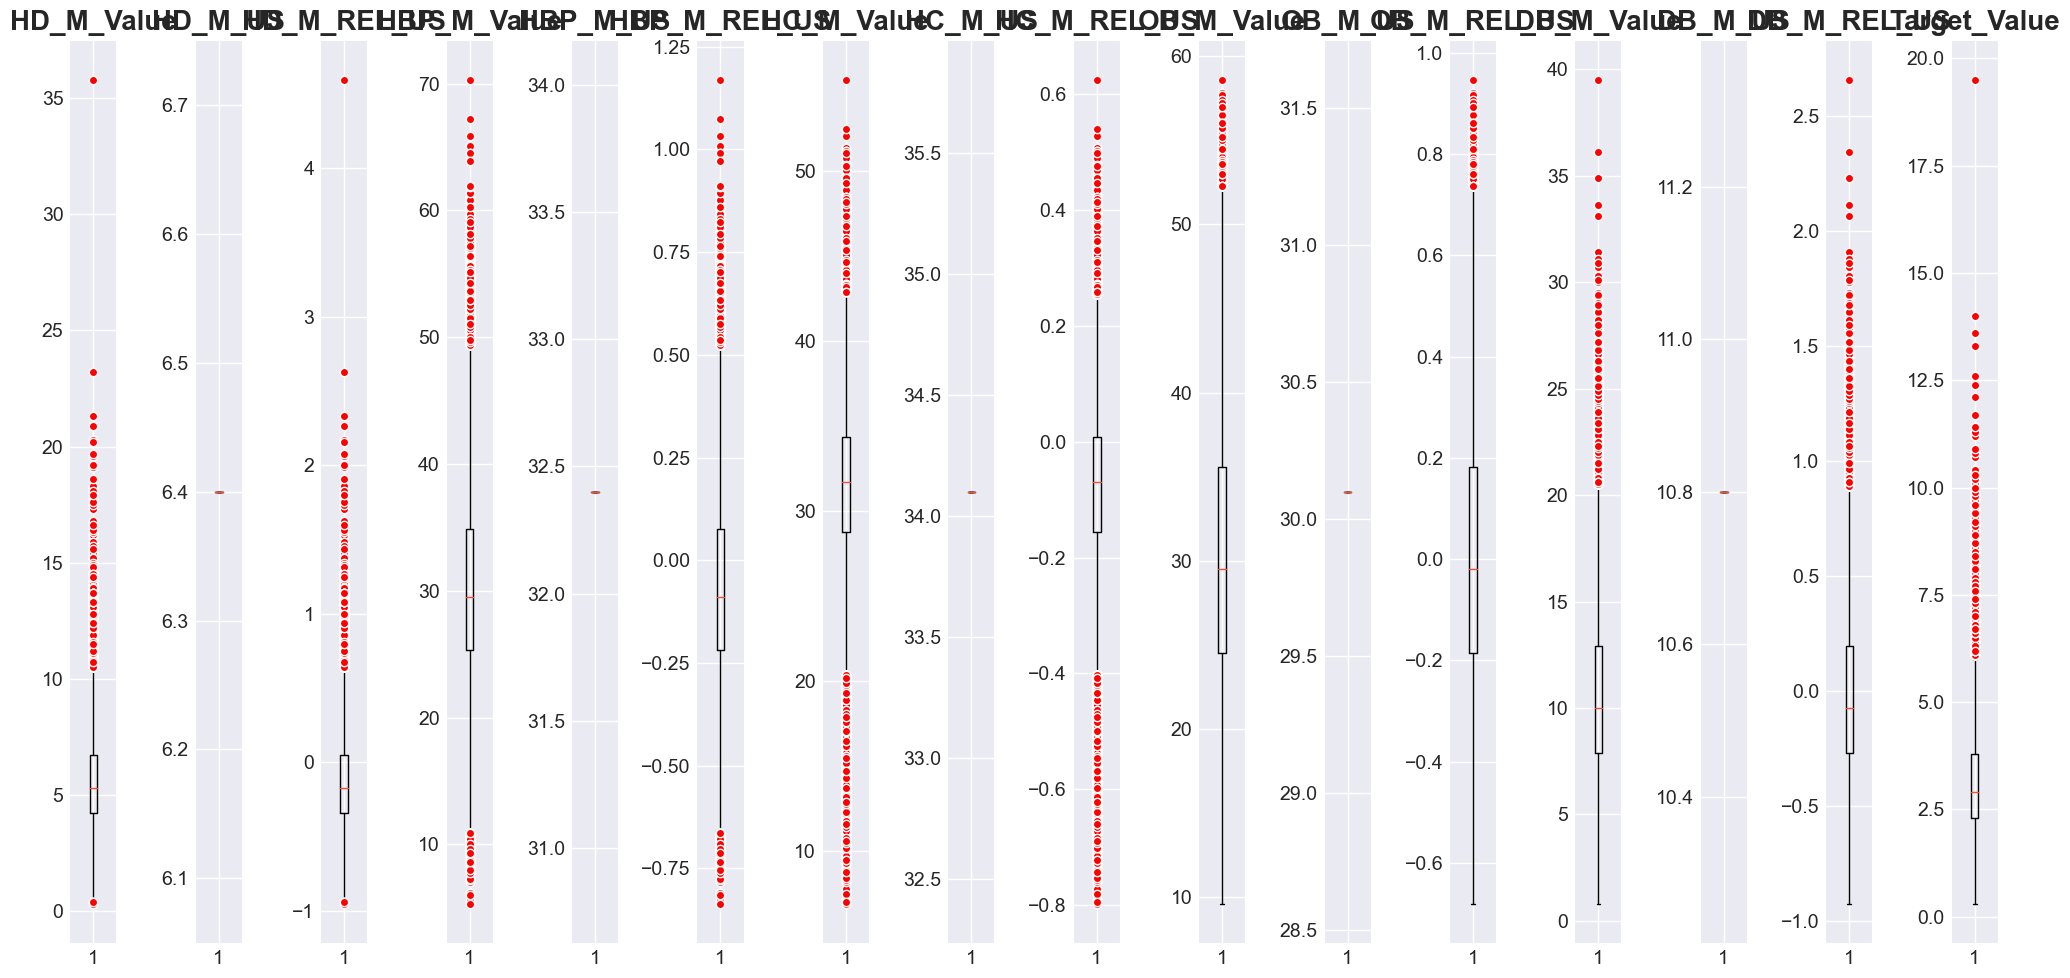

In [160]:
#Subplot


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,27210.0,5.602977,2.118858e+00,0.300000,4.200000,5.300000,6.700000,35.800000
HD_M_US,27210.0,6.400000,3.244575e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,27210.0,-0.124535,3.310716e-01,-0.953125,-0.343750,-0.171875,0.046875,4.593750
HBP_M_Value,27210.0,30.653208,8.260472e+00,5.300000,25.300000,29.500000,34.900000,70.300000
HBP_M_US,27210.0,32.400000,1.514194e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,27210.0,-0.053913,2.549528e-01,-0.836420,-0.219136,-0.089506,0.077160,1.169753
HC_M_Value,27210.0,31.364296,4.887047e+00,6.900000,28.800000,31.700000,34.400000,55.400000
HC_M_US,27210.0,34.100000,1.554696e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,27210.0,-0.080226,1.433152e-01,-0.797654,-0.155425,-0.070381,0.008798,0.624633
OB_M_Value,27210.0,30.472922,8.180685e+00,9.600000,24.500000,29.500000,35.600000,58.600000


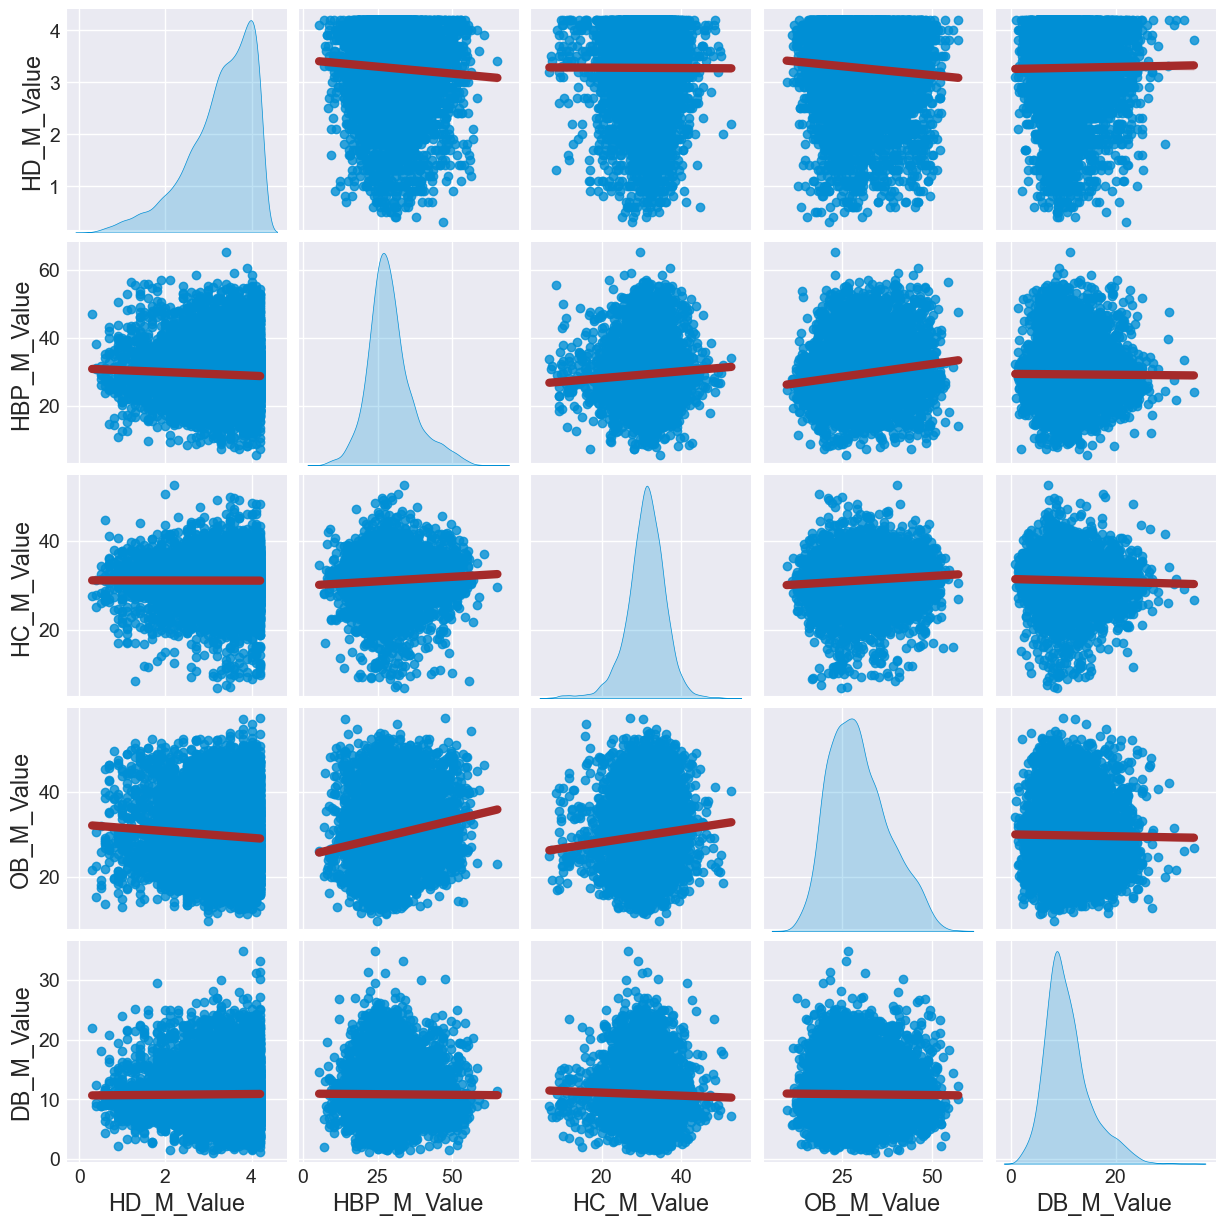

In [162]:
# plot 
df02 = df[df['HD_M_Value'] <= 4.200000 ]
col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
sns.pairplot(df02[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
#sns.pairplot(df02[col_to_plot01], hue='OB_M_Value' )


In [163]:
#Scattler plot - Relationship between Obesity and Diabetes.
#plt.xlabel('High Blood Pressure and Cholesterol')
#plt.ylabel('Stroke')
#plt.scatter(df.HD_M_Value, df.HC_M_Value, color= 'red', marker='*')
#plt.show()



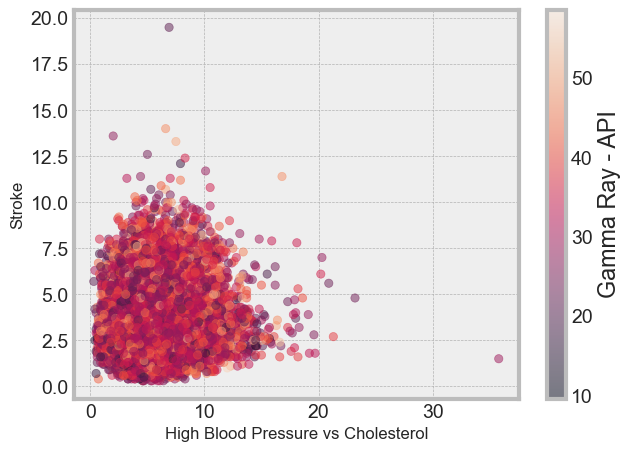

In [164]:
np.random.seed(19680801)
N = 50
plt.style.use('bmh')
colors = np.random.rand(N)

plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.5)
#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value',  vmin=0, vmax=100, cmap='rainbow')

#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='colors', alpha=0.9)

#plt.scatter(x='HD_M_Value', y='Target_Value', data=df)
#plt.xlim(-5, 60) # change the x and y ranges
#plt.xlim(3.0, 1.5)
plt.xlabel('High Blood Pressure vs Cholesterol', fontsize=12)
plt.ylabel('Stroke', fontsize=12)

plt.colorbar(label='Gamma Ray - API')

plt.show()

## Dividing the dataset into independent and dependent features.

In [165]:

X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

#X

ML Analysis - LinearRegression Model

In [166]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [167]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#80% training - it chooses ramdom samples.
len(X_train)
#20% or what ever % specified.
len(X_test)

X_train

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US
25315,1.6,6.4,-0.750000,35.2,32.4,0.086420,32.8,34.1,-0.038123,31.4,30.1,0.043189,24.3,10.8,1.250000
9023,4.2,6.4,-0.343750,24.0,32.4,-0.259259,30.6,34.1,-0.102639,22.4,30.1,-0.255814,16.2,10.8,0.500000
18124,5.6,6.4,-0.125000,35.0,32.4,0.080247,30.6,34.1,-0.102639,27.1,30.1,-0.099668,7.3,10.8,-0.324074
20703,6.4,6.4,0.000000,41.2,32.4,0.271605,28.3,34.1,-0.170088,25.9,30.1,-0.139535,4.6,10.8,-0.574074
7710,3.9,6.4,-0.390625,40.5,32.4,0.250000,30.7,34.1,-0.099707,27.9,30.1,-0.073090,13.5,10.8,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,7.7,6.4,0.203125,25.2,32.4,-0.222222,19.4,34.1,-0.431085,46.4,30.1,0.541528,16.4,10.8,0.518519
20732,8.4,6.4,0.312500,34.6,32.4,0.067901,30.8,34.1,-0.096774,49.9,30.1,0.657807,6.2,10.8,-0.425926
6196,6.8,6.4,0.062500,24.8,32.4,-0.234568,31.7,34.1,-0.070381,22.3,30.1,-0.259136,3.9,10.8,-0.638889
17684,8.2,6.4,0.281250,40.4,32.4,0.246914,34.6,34.1,0.014663,25.3,30.1,-0.159468,9.5,10.8,-0.120370


ML Analyzing using - Linear Regression Model.

In [168]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [169]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test

print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error

# The mean of the absolute error - this is mean of the residuat error of the test.

r2:-34.230750284153935  
mae:1.0383072981629378  
-34.230750284153935
1.0383072981629378
0.32129499655879773


ML Analyzing using - Decision Tree Model.

In [170]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.5381002944387088
r2:-0.7580392039859811  
mae:1.5125872840867327  
-0.7580392039859811
1.5125872840867327


#### ML Analyzing using - RandomForestRegressor Model.

In [171]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)

mean_absolute_percentage_error(y_pred,y_test)
print("r2:{} ".format(r2_score(y_pred,y_test)))
print("mae:{} ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))


r2:-9.616728003834686 
mae:1.0823895626607865 
-9.616728003834686
1.0823895626607865
